#Instructions:
###1)The final code will be in the main cell
###2)Copy from the main cell and experiment in your own
###3)Main cell to be modified only after dicussion
###4)This webiste doesn't provide real time collboration like google docs
so we wont be able to see who edited what. Also wont be able to see real time edits.
So work in your own cell only

There is an arrow on the left of your cell ...click to expand the code

###5)Always press ctrl-s for saving
###6)Donot edit the colab at the same time as other users as saving your changes will override other user's changes since no real time collaboration

##First Iteration.
Testing LDA(Latent Dirichlet Allocation) for feature selection and using the topic models as feature vectors for classification.

In [ ]:
import pandas as pd
import nltk
import gensim
from gensim import corpora
import pprint as pp
nltk.download('stopwords')
nltk.download('wordnet')
import string
from google.colab import files
#uploaded = files.upload()
from nltk.stem import WordNetLemmatizer


#Make a dataframe
df = pd.read_csv("kagglemonica.csv")

df=df.head(5)

#Make a list of all the summary
lst = df["Summary"].to_list()
pp.pprint(lst)
print("")

#exclude stopwords and lemmatize
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in lst]
# print(doc_clean)
# print("")

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)
# print(dictionary)
# print("")

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
# print(doc_term_matrix)


# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)
pp.pprint(ldamodel.print_topics(num_topics=5, num_words=5))

## Main Cell -- Only copy from this cell
### Using TF-IDF and different classification algos

In [ ]:
import pandas as pd

from google.colab import files
#uploaded = files.upload()

import nltk
import gensim
from gensim import corpora

import pprint as pp

nltk.download('stopwords')
nltk.download('wordnet')

import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier
import pickle


df=pd.read_csv("eclipse.csv")
#df=df.head(100)
#print(df["Assignee"].value_counts().plot.barh())


summ=df["Summary"]
# pp.pprint(summ)


#exclude stopwords and lemmatize
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
  stop_free = " ".join([i for i in text.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

# apply clean function to df series 'Summary'
df['Summary'] = df['Summary'].apply(clean)
# pp.pprint(df['Summary'])

finaldf = df[['Assignee','Summary']]
# pp.pprint(finaldf)
print('')

finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))

print('initial data',finaldf)
# assignee=df['Assignee'].unique()

valcnt = df['Assignee'].value_counts()
print('')
valcnt = valcnt[valcnt>80]
print('')
valcnt = valcnt[valcnt<=600]
print(valcnt)
print(len(valcnt))
to_include = valcnt.index
# print(to_include)
print('')
# print(finaldf)
print('')
finaldf = finaldf[df.Assignee.isin(to_include)]
print('')
print(finaldf)
finaldf.to_csv('kagglemonicaSubsetForAssignee.csv')
print('============================================================================================')

# finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))
print('')



print('============================================================================================')

# finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))

# print(type(assignee))
# assignee = list(assignee)
# print(type(assignee))

# pp.pprint(assignee)

# splitting the dateset into test and train
y = finaldf.Assignee
X = finaldf.Summary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42, stratify = y,shuffle=True)

# assignee = y_test.unique()

# To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Multinomial Naive Bayes')
print('accuracy %s' % accuracy_score(y_test, y_pred ))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))

#print(type(y_pred))
# for i in range(len(y_pred)):
#   if y_test[]!=y_pred[i]:
#     print(y_pred[i])
#print(type(y_test))
# print(y_test[0])
# print(y_test[1731])
# print(y_test[:5])
# print(y_pred[:5])

print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')

# Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),#SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print('')
print('Linear Support Vector Machine')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))
print(' ')



# print('######################################## KFOLD CV of LinearSVC##############################')

# tfid= TfidfVectorizer()

# X = tfid.fit_transform(X).toarray()
# kfold = KFold(n_splits = 10,shuffle=True)
# model = LinearSVC()
# results = model_selection.cross_val_score(model, X, y, cv=kfold)
# print('kfold cv results with Linear SVC:', results.mean())



print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('')
print('Logistic Regression')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))


#print(classification_report(y_test, y_pred,target_names=assignee))

print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')

decisiontree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier()),
               ])
decisiontree.fit(X_train,y_train)

y_pred = decisiontree.predict(X_test)
print('')
print('Decision Tree')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))


print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')


####     BAGGED DECISION TREE    ############

# tfid= TfidfVectorizer()

# X = tfid.fit_transform(X).toarray()

# seed = 8
# kfold = model_selection.StratifiedKFold(n_splits = 5,
#                        random_state = 1)

# # initialize the base classifier
# base_cls = DecisionTreeClassifier()

# # no. of base classifier
# num_trees = 100

# # bagging classifier
# model = BaggingClassifier(base_estimator = base_cls,
#                           n_estimators = num_trees,
#                           random_state = seed)

# results = model_selection.cross_val_score(model, X, y, cv = kfold)
# print('BAGGED DECISION TREE')
# print("accuracy :")
# print(results.mean())


#########         VOITNG ENSEMBLE     #######################
print('###########################     VOITNG ENSEMBLE     #######################################')


# tfid= TfidfVectorizer()

# X = tfid.fit_transform(X).toarray()

# seed = 8
# kfold = model_selection.StratifiedKFold(n_splits = 5)


# # create the sub models
# estimators = []
# model1 = LogisticRegression()
# estimators.append(('logistic', model1))
# model2 = MultinomialNB()
# estimators.append(('NB', model2))
# model3 = SVC()
# estimators.append(('svm', model3))
# #create the ensemble model
# ensemble = VotingClassifier(estimators)
# results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
# print('VOTING ENSEMBLE RESULTS',results.mean())


print('###############   Predicting on unseen with linearsvc##########################')

# Had to retrain since fitted model's instance was needed which was not saved above because it used pipline

cv2 = TfidfVectorizer(stop_words='english')
xtraincv = cv2.fit_transform(X_train)
pickle.dump(cv2, open('tfidfass.sav', 'wb'))
xtestcv = cv2.transform(X_test)
fitted = LinearSVC().fit(xtraincv, y_train)

pickle.dump(fitted, open('linearsvc-ass.sav','wb'))



inputstr = cv2.transform(["Writer crashes in print preview"])
y_pred=fitted.predict(xtestcv)
print('accuracy %s' % accuracy_score(y_pred, y_test))


lsvc = pickle.load(open('linearsvc-ass.sav','rb'))
result = lsvc.predict(inputstr)
print('Thorgh lsvc:',result)
# result = fitted.predict(inputstr)
# print(result)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


FileNotFoundError: ignored

#Main Cell for severity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!

initial data          Severity                                            Summary
0           major  package viewer order resource folder resource ...
1          normal                  wrong execution classpath 1gey0w0
2          normal                         type hierachy typo 1gjw2xj
3          normal  workspace source locator fails mulitple packag...
4          normal               close editor brings hierarchy object
...           ...                                                ...
9995        minor                   api method show console view bug
9996        minor             empty string program argument accepted
9997  enhancement  artwork breakpoints disabled skipped bullet di...
9998       normal                     launch name truncated mr

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score 0.6518
F1 Score 0.5146703522076171
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------

Linear Support Vector Machine
accuracy 0.614
precision score 0.5324993240724999
Recall Score 0.614
F1 Score 0.555526928144427
 
######################################## KFOLD CV of LinearSVC##############################
kfold cv results with Linear SVC: 0.6367
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------

Logistic Regression
accuracy 0.6514
precision score 0.5293189527630807
Recall Score 0.6514
F1 Score 0.5359758488350348
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Decision Tree
accuracy 0.5302
precision score 0.5073944534274231
Recall Score 0.5302
F1 Score 0.5177770578594921
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
##################################################################
###############   Predicting on unseen with linearsvc##########################
accuracy 0.6176
Thorgh lsvc: ['critical']


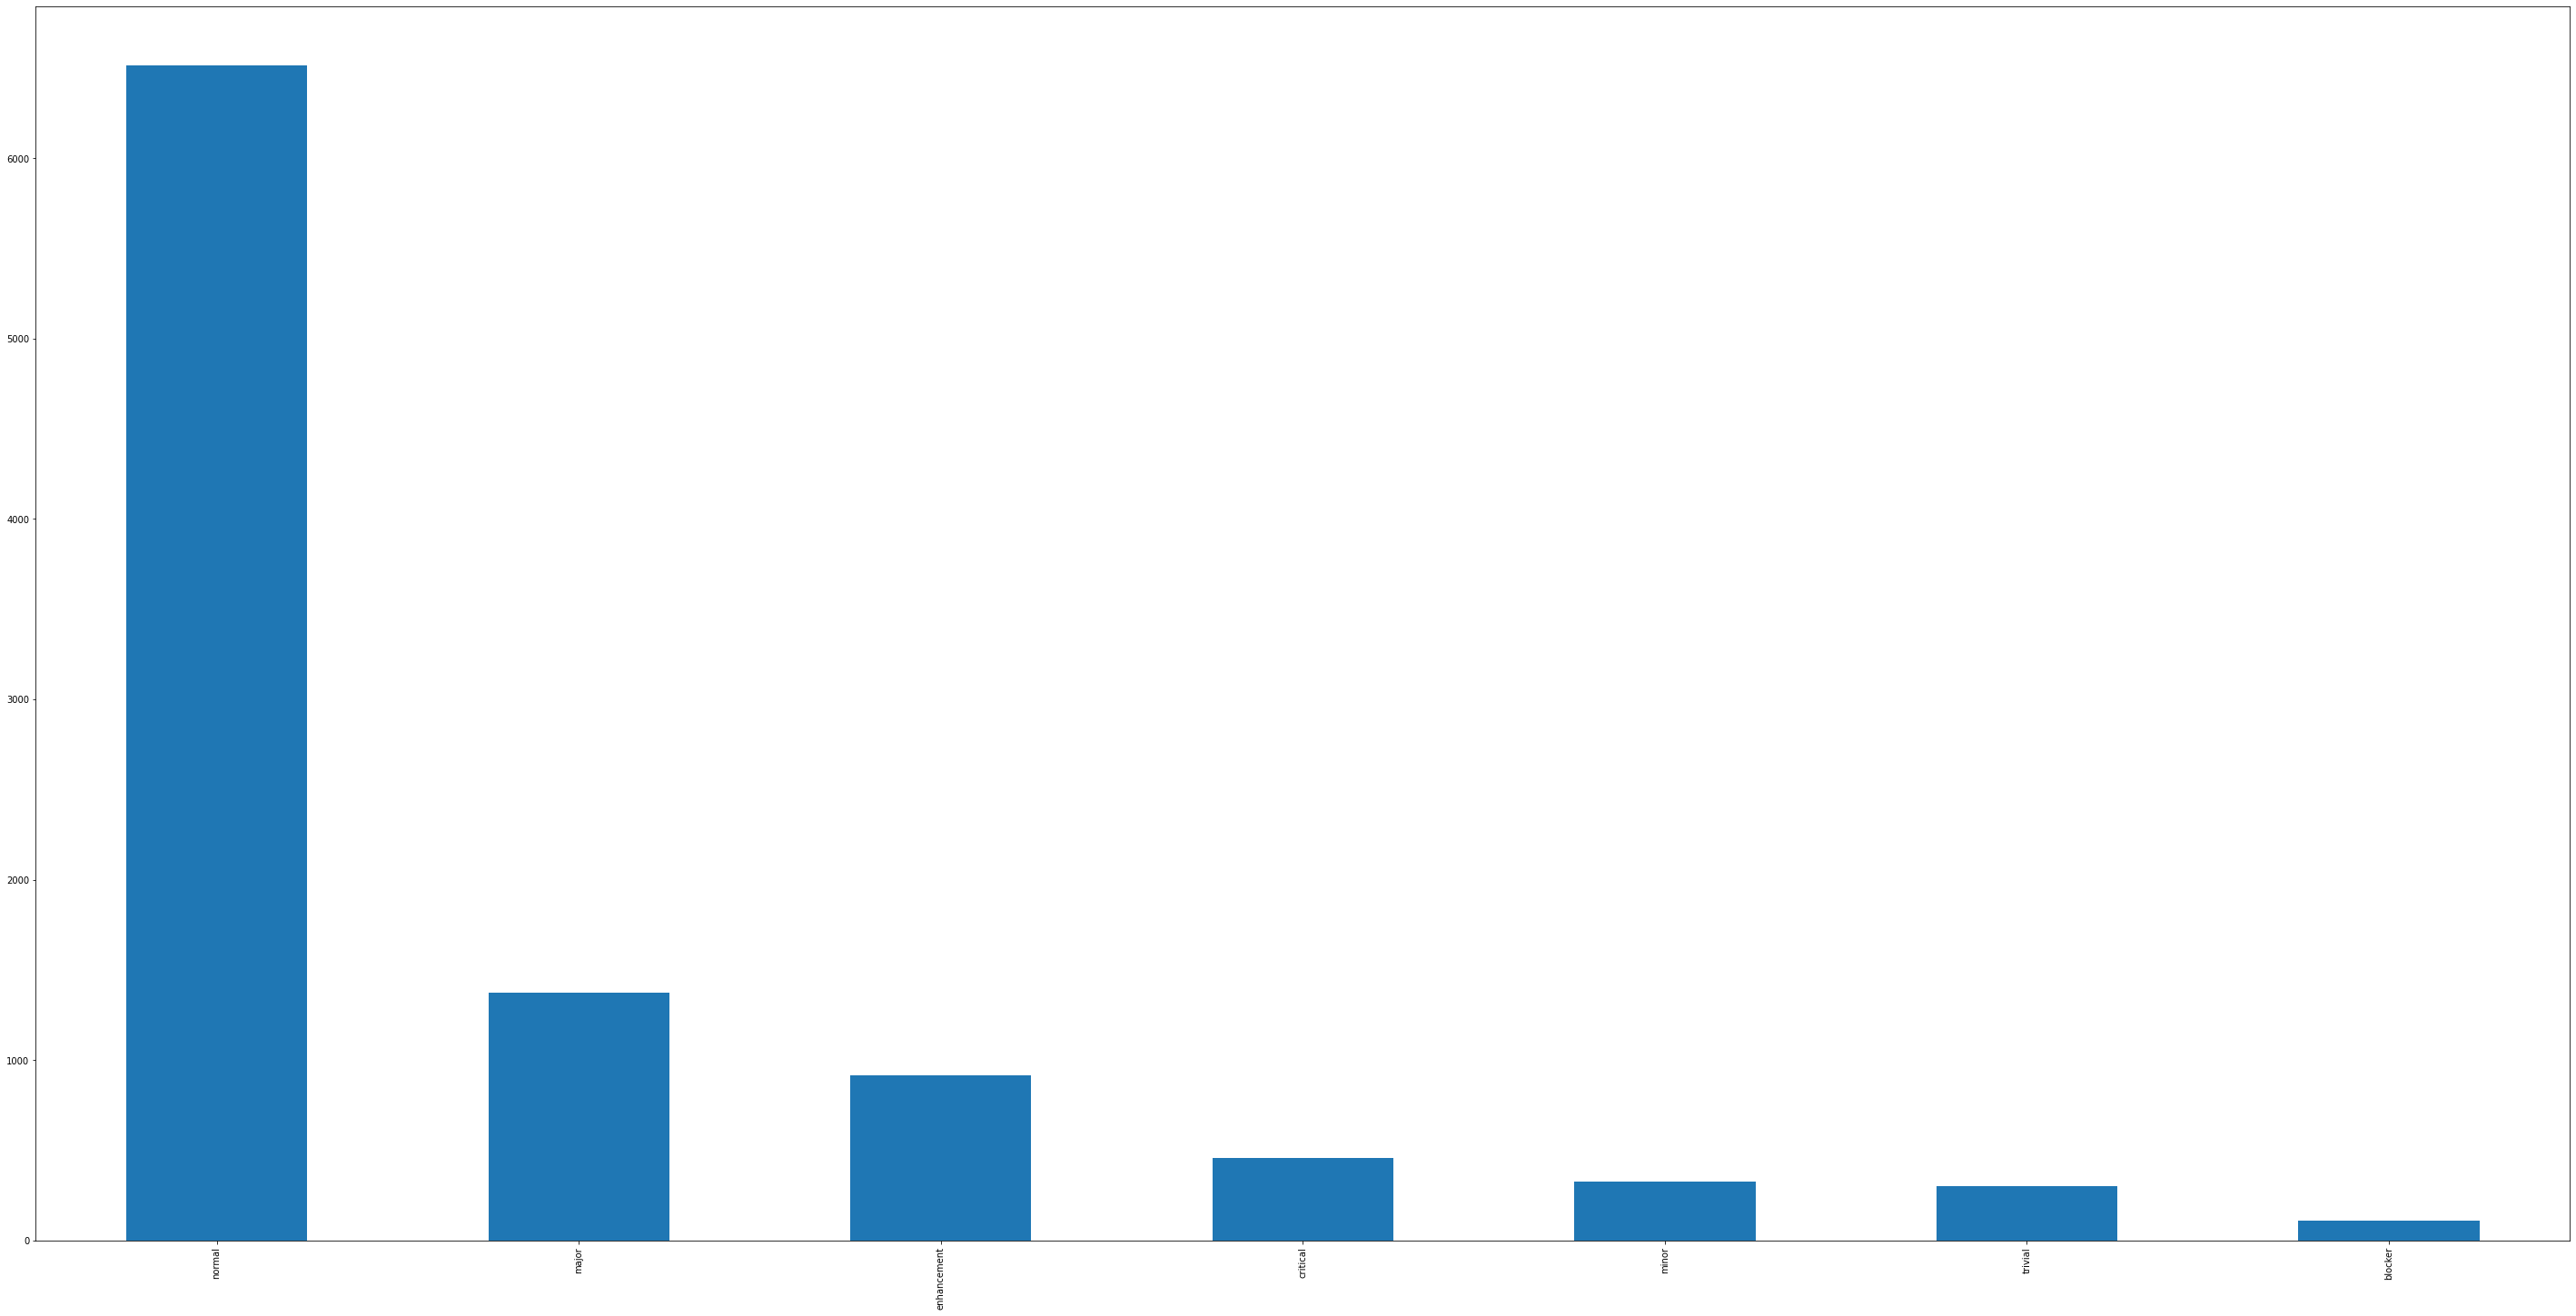

In [ ]:
import pandas as pd

from google.colab import files
#uploaded = files.upload()

import nltk
import gensim
from gensim import corpora

import pprint as pp

nltk.download('stopwords')
nltk.download('wordnet')

import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier

import pickle

df=pd.read_csv("kagglemonica.csv")
#df=df.head(100)
#print(df["Assignee"].value_counts().plot.barh())


summ=df["Summary"]
# pp.pprint(summ)


#exclude stopwords and lemmatize
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
  stop_free = " ".join([i for i in text.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

# apply clean function to df series 'Summary'
df['Summary'] = df['Summary'].apply(clean)
# pp.pprint(df['Summary'])

finaldf = df[['Severity','Summary']]
# pp.pprint(finaldf)
print('')

# finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))

print('initial data',finaldf)
# # assignee=df['Assignee'].unique()

# valcnt = df['Assignee'].value_counts()
# print('')
# valcnt = valcnt[valcnt>80]
# print('')
# valcnt = valcnt[valcnt<=600]
# print(valcnt)
# print(len(valcnt))
# to_include = valcnt.index
# # print(to_include)
# print('')
# # print(finaldf)
# print('')
# finaldf = finaldf[df.Assignee.isin(to_include)]
# print('')
# print(finaldf)

# print('============================================================================================')

# finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))
# print('')



print('============================================================================================')

finaldf['Severity'].value_counts().plot.bar(figsize = (50,25))

# print(type(assignee))
# assignee = list(assignee)
# print(type(assignee))

# pp.pprint(assignee)

# splitting the dateset into test and train
y = finaldf.Severity
X = finaldf.Summary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42, stratify = y,shuffle=True)

# assignee = y_test.unique()

# To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Multinomial Naive Bayes')
print('accuracy %s' % accuracy_score(y_test, y_pred ))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))

#print(type(y_pred))
# for i in range(len(y_pred)):
#   if y_test[]!=y_pred[i]:
#     print(y_pred[i])
#print(type(y_test))
# print(y_test[0])
# print(y_test[1731])
# print(y_test[:5])
# print(y_pred[:5])

print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')

# Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),#SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print('')
print('Linear Support Vector Machine')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))
print(' ')



print('######################################## KFOLD CV of LinearSVC##############################')

tfid= TfidfVectorizer()

X = tfid.fit_transform(X).toarray()
kfold = KFold(n_splits = 10,shuffle=True)
model = LinearSVC()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print('kfold cv results with Linear SVC:', results.mean())



print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('')
print('Logistic Regression')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))


#print(classification_report(y_test, y_pred,target_names=assignee))

print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')

decisiontree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier()),
               ])
decisiontree.fit(X_train,y_train)

y_pred = decisiontree.predict(X_test)
print('')
print('Decision Tree')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
# print(classification_report(y_test, y_pred))


print('---------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------')


####     BAGGED DECISION TREE    ############

# tfid= TfidfVectorizer()

# X = tfid.fit_transform(X).toarray()

# seed = 8
# kfold = model_selection.StratifiedKFold(n_splits = 5,
#                        random_state = 1)

# # initialize the base classifier
# base_cls = DecisionTreeClassifier()

# # no. of base classifier
# num_trees = 100

# # bagging classifier
# model = BaggingClassifier(base_estimator = base_cls,
#                           n_estimators = num_trees,
#                           random_state = seed)

# results = model_selection.cross_val_score(model, X, y, cv = kfold)
# print('BAGGED DECISION TREE')
# print("accuracy :")
# print(results.mean())


#########         VOITNG ENSEMBLE     #######################
print('##################################################################')


# tfid= TfidfVectorizer()

# X = tfid.fit_transform(X).toarray()

# seed = 8
# kfold = model_selection.StratifiedKFold(n_splits = 5)


# # create the sub models
# estimators = []
# model1 = LogisticRegression()
# estimators.append(('logistic', model1))
# model2 = MultinomialNB()
# estimators.append(('NB', model2))
# model3 = SVC()
# estimators.append(('svm', model3))
# #create the ensemble model
# ensemble = VotingClassifier(estimators)
# results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
# print('VOTING ENSEMBLE RESULTS',results.mean())


print('###############   Predicting on unseen with linearsvc##########################')

# Had to retrain since fitted model's instance was needed which was not saved above because it used pipline

cv2 = TfidfVectorizer(stop_words='english')
xtraincv = cv2.fit_transform(X_train)
pickle.dump(cv2, open('tfidf', 'wb'))
xtestcv = cv2.transform(X_test)
fitted = LinearSVC().fit(xtraincv, y_train)
pickle.dump(fitted, open('linearsvc-severity.sav','wb'))


inputstr = cv2.transform(["Text search should not use TEXT from team"])
y_pred=fitted.predict(xtestcv)
print('accuracy %s' % accuracy_score(y_pred, y_test))

lsvc = pickle.load(open('linearsvc-severity.sav','rb'))
result = lsvc.predict(inputstr)
print('Thorgh lsvc:',result)

# result = fitted.predict(inputstr)
# print(result)

###Testing on inbuilt dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
                                                reviews  rating
0                              Wow... Loved this place.       1
1                                    Crust is not good.       0
2             Not tasty and the texture was just nasty.       0
3     Stopped by during the late May bank holiday of...       1
4     The selection on the menu was great and so wer...       1
...                                                 ...     ...
2743  I just got bored watching Jessice Lange take h...       0
2744  Unfortunately, any virtue in this film's produ...       0
2745                   In a word, it is embarrassing.         0
2746                               Exceptionally bad!         0
2747  All in all its an insult to one's intelligence...       

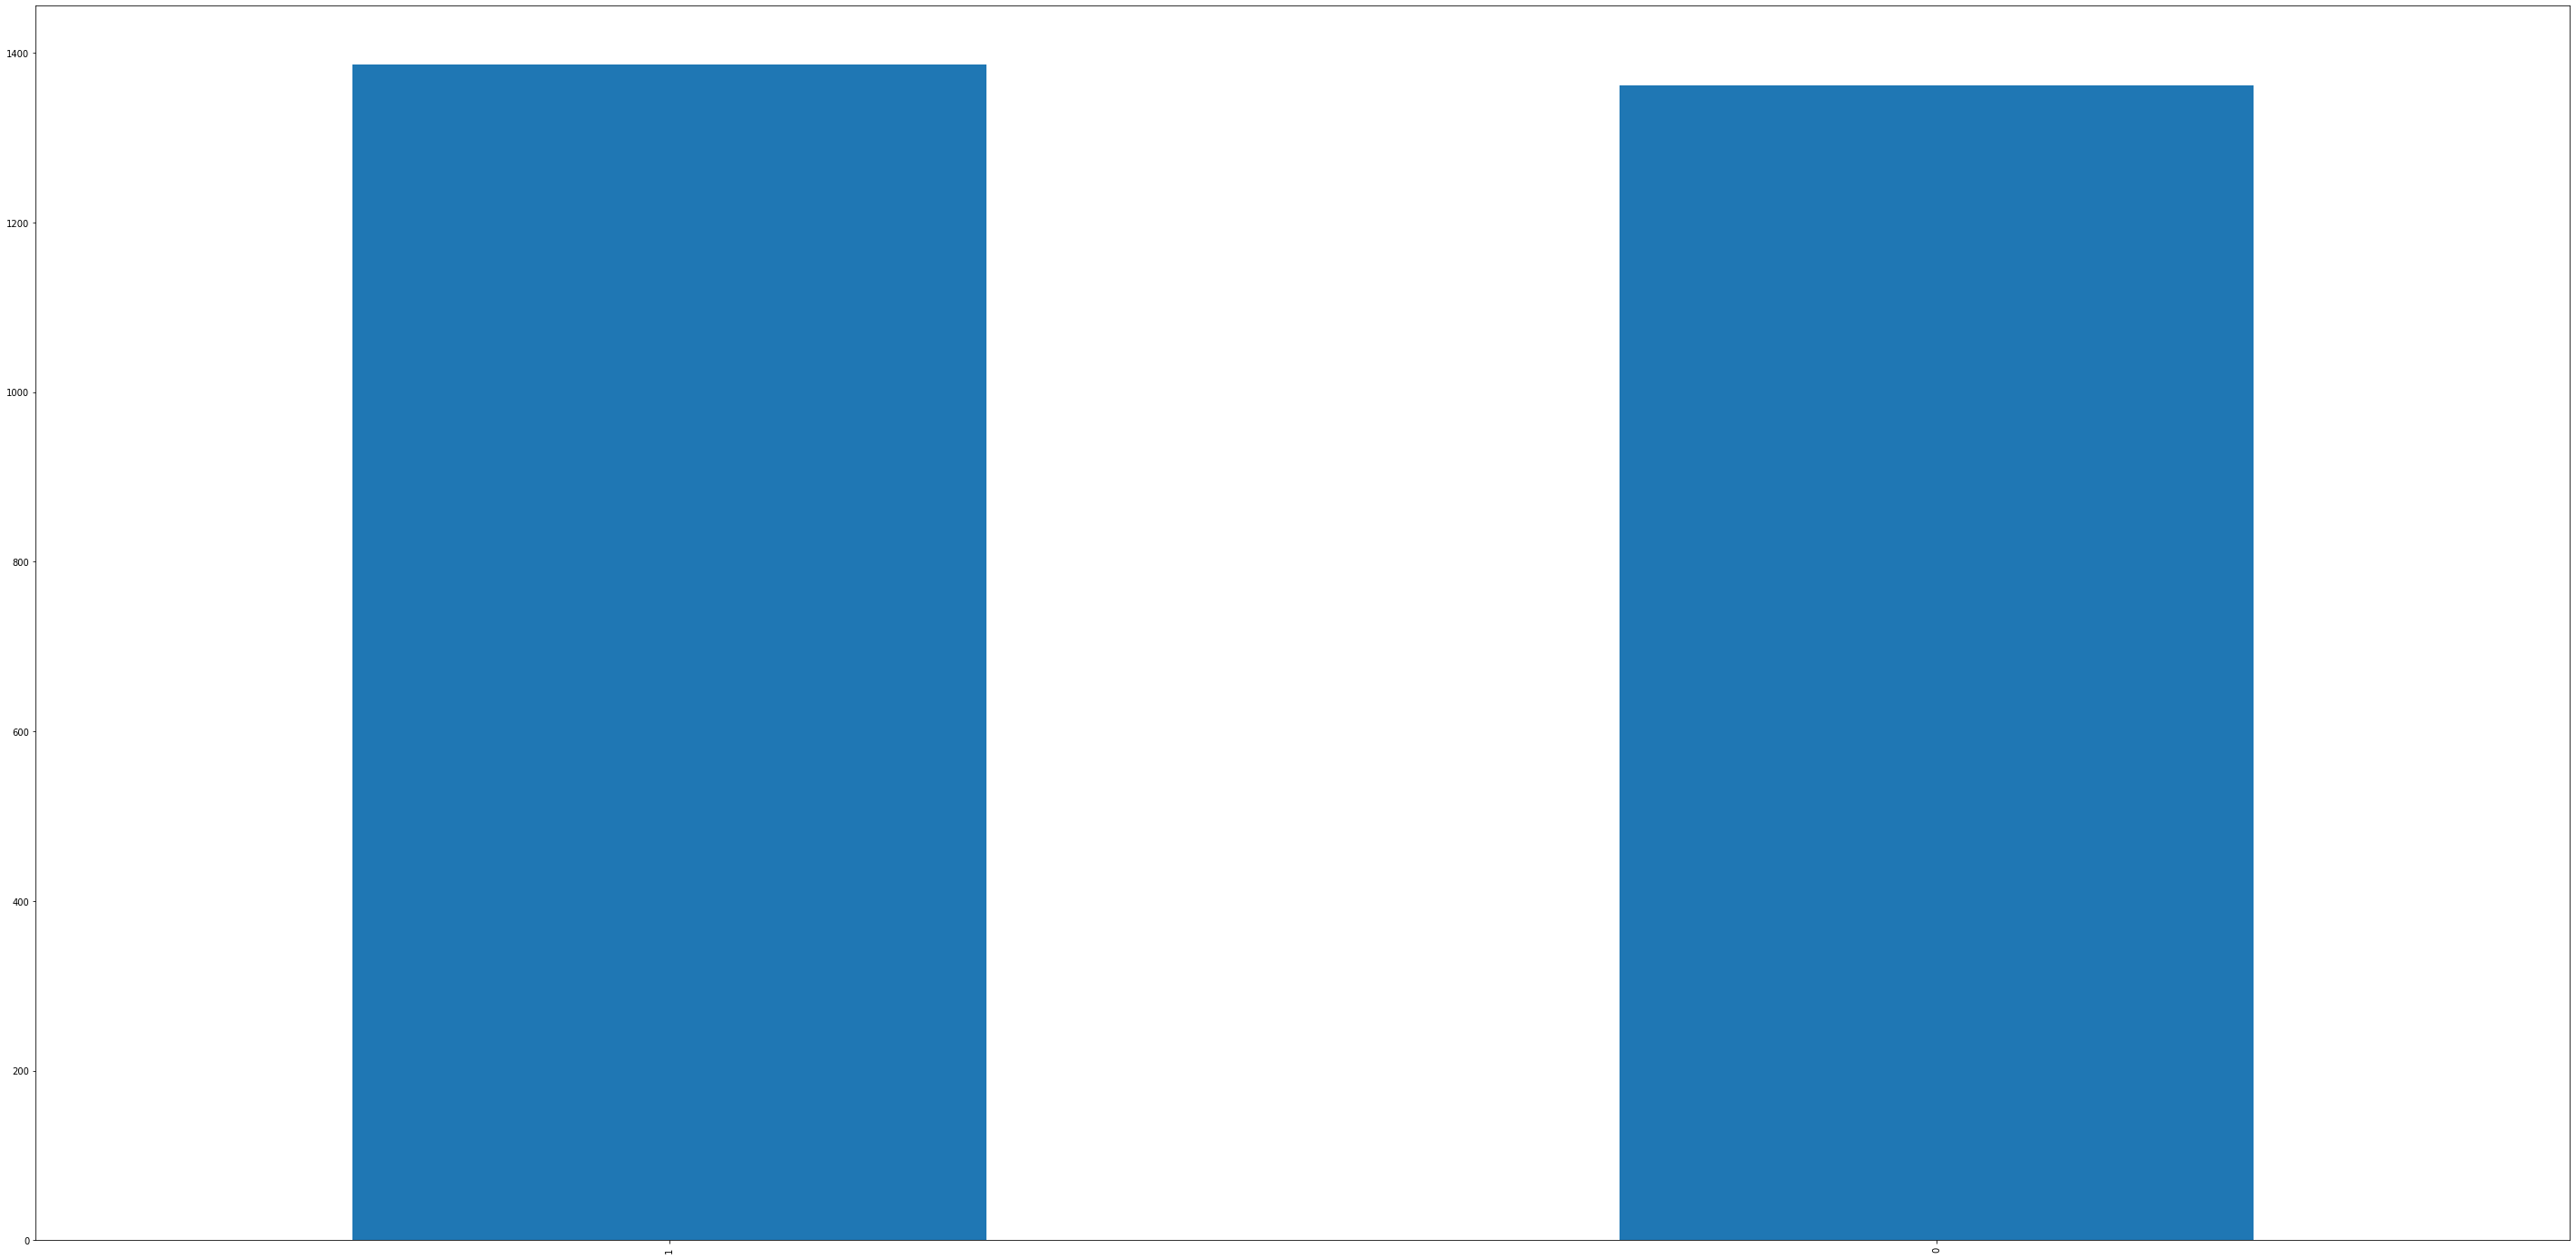

In [ ]:
import pandas as pd

from google.colab import files
#uploaded = files.upload()

import nltk
import gensim
from gensim import corpora

import pprint as pp

nltk.download('stopwords')
nltk.download('wordnet')

import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier
yelp_ds = pd.read_csv('yelp_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])
amazon_ds = pd.read_csv('amazon_cells_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])
imdb_ds = pd.read_csv('imdb_labelled.txt', sep ='\t', header = None, names = ['reviews', 'rating'])

df = pd.concat([yelp_ds, amazon_ds, imdb_ds], ignore_index = True)
print(df)


#exclude stopwords and lemmatize
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
  stop_free = " ".join([i for i in text.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

# apply clean function to df series 'Summary'
df['reviews'] = df['reviews'].apply(clean)

print(df)

# splitting the dateset into test and train
y = df.rating
X = df.reviews
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 42, stratify = y )

# assignee = y_test.unique()

# To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Multinomial Naive Bayes')
print('accuracy %s' % accuracy_score(y_test, y_pred ))
print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
print('Recall Score %s' % recall_score(y_test,y_pred,average='weighted'))
print('F1 Score %s' % f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test, y_pred))

df['rating'].value_counts().plot.bar(figsize = (50,25))



##Dhruv's Cell

In [ ]:
import pandas as pd

from google.colab import files
#uploaded = files.upload()

import nltk
import gensim
from gensim import corpora

import pprint as pp

nltk.download('stopwords')
nltk.download('wordnet')

import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier



df=pd.read_csv("kagglemonica.csv")
#df=df.head(100)
#print(df["Assignee"].value_counts().plot.barh())


summ=df["Summary"]
# pp.pprint(summ)


#exclude stopwords and lemmatize
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
  stop_free = " ".join([i for i in text.lower().split() if i not in stop])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
  return normalized

# apply clean function to df series 'Summary'
df['Summary'] = df['Summary'].apply(clean)
# pp.pprint(df['Summary'])

finaldf = df[['Assignee','Summary']]
pp.pprint(finaldf)
print('')


assignee=df['Assignee'].unique()

# pp.pprint(assignee)
valcnt = df['Assignee'].value_counts()

print('')
valcnt = valcnt[valcnt>15]
print(valcnt)
print(len(valcnt))
print('')
valcnt = valcnt[valcnt<=500]
print(valcnt)
print(len(valcnt))
to_include = valcnt.index
# print(to_include)
print('')
# print(finaldf)
print('')
finaldf = finaldf[df.Assignee.isin(to_include)]
print('')
print(finaldf)

print('============================================================================================')

finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))

# splitting the dateset into test and train
y = finaldf.Assignee
X = finaldf.Summary
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

tfid= TfidfVectorizer()

X = tfid.fit_transform(X).toarray()


seed = 7
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=1)
# model = LinearSVC()
# num_trees = 10
# # ensemble = BaggingClassifier(base_estimator=model, n_estimators=num_trees, random_state=seed)
# results = model_selection.cross_val_score(model, X, y, cv=kfold)

# print('')
# print('RESULTS')
# print(results.mean())


# create the sub models
# estimators = []
# model1 = LogisticRegression()
# estimators.append(('logistic', model1))
# model2 = MultinomialNB()
# estimators.append(('NB', model2))
# model3 = LinearSVC()
# estimators.append(('svm', model3))
# create the ensemble model
# ensemble = VotingClassifier(estimators)

ensemble = LinearSVC()
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print('RESULTS',results.mean())

# To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.
# nb = Pipeline([('vect', CountVectorizer()),
#                ('tfidf', TfidfTransformer()),
#                ('clf', MultinomialNB()),
#               ])
# nb.fit(X_train, y_train)

# y_pred = nb.predict(X_test)
# print('Multinomial Naive Bayes')
# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))
#print(classification_report(y_test, y_pred,target_names=assignee))

#print(type(y_pred))
# for i in range(len(y_pred)):
#   if y_test[]!=y_pred[i]:
#     print(y_pred[i])
#print(type(y_test))
# print(y_test[0])
# print(y_test[1731])
# print(y_test[:5])
# print(y_pred[:5])

# print('---------------------------------------------------------------------------------------------------')
# print('---------------------------------------------------------------------------------------------------')

# Linear Support Vector Machine
# sgd = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', LinearSVC()),#SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
#                ])

# sgd.fit(X_train, y_train)
# y_pred = sgd.predict(X_test)
# print('')
# print('Linear Support Vector Machine')
# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))

# print('---------------------------------------------------------------------------------------------------')
# print('---------------------------------------------------------------------------------------------------')

# logreg = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', LogisticRegression(n_jobs=1, C=1e5)),
#                ])
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# print('')
# print('Logistic Regression')
# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('precision score %s' % precision_score(y_test,y_pred,average='weighted'))

#print(classification_report(y_test, y_pred,target_names=assignee))

##LEARNING VALUECOUNT


In [ ]:
d={'ass':['a','a','b','c','a','a','b'], 'summ':['dgfg','ghd','ghr','uiyu','ertye','cbnx','qer']}
df = pd.DataFrame(d)
print(df)
print('')
vc = df.ass.value_counts()
print('value counts\n',vc)
print('value counts > 1\n',vc[vc>1])
to_remove = vc[vc > 1].index
print(to_remove)
df = df[~df.ass.isin(to_remove)]
print(df)

  ass   summ
0   a   dgfg
1   a    ghd
2   b    ghr
3   c   uiyu
4   a  ertye
5   a   cbnx
6   b    qer

value counts
 a    4
b    2
c    1
Name: ass, dtype: int64
value counts > 1
 a    4
b    2
Name: ass, dtype: int64
Index(['a', 'b'], dtype='object')
  ass  summ
3   c  uiyu


##USING DOC2VEC AND LOGISTIC

In [ ]:
import pandas as pd

from google.colab import files
#uploaded = files.upload()

import nltk
import gensim
from gensim import corpora

import pprint as pp

nltk.download('stopwords')
nltk.download('wordnet')

import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn import model_selection

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier

###Testing data augmentation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
michael.stahl         1960
jluth                 1810
erack                 1590
mikekaganski           970
serval2412             950
markus.mohrhard        630
varga.balazs3          590
nemeth                 540
kohei                  520
Armin.Le.Grand         500
heiko.tietze           480
Katarina.Behrens       450
momonasmon             440
raykowj                410
sbergman               410
s.mehrbrodt            400
vasily.melenchuk       380
dennisfrancis.in       360
bakos.attilakaroly     320
tundeth                310
zolnaitamas2000        310
lionel                 280
serge.krot             270
m.weghorn              240
Name: Assignee, dtype: int64
24
          Assignee                                            Summary
0         sbergm

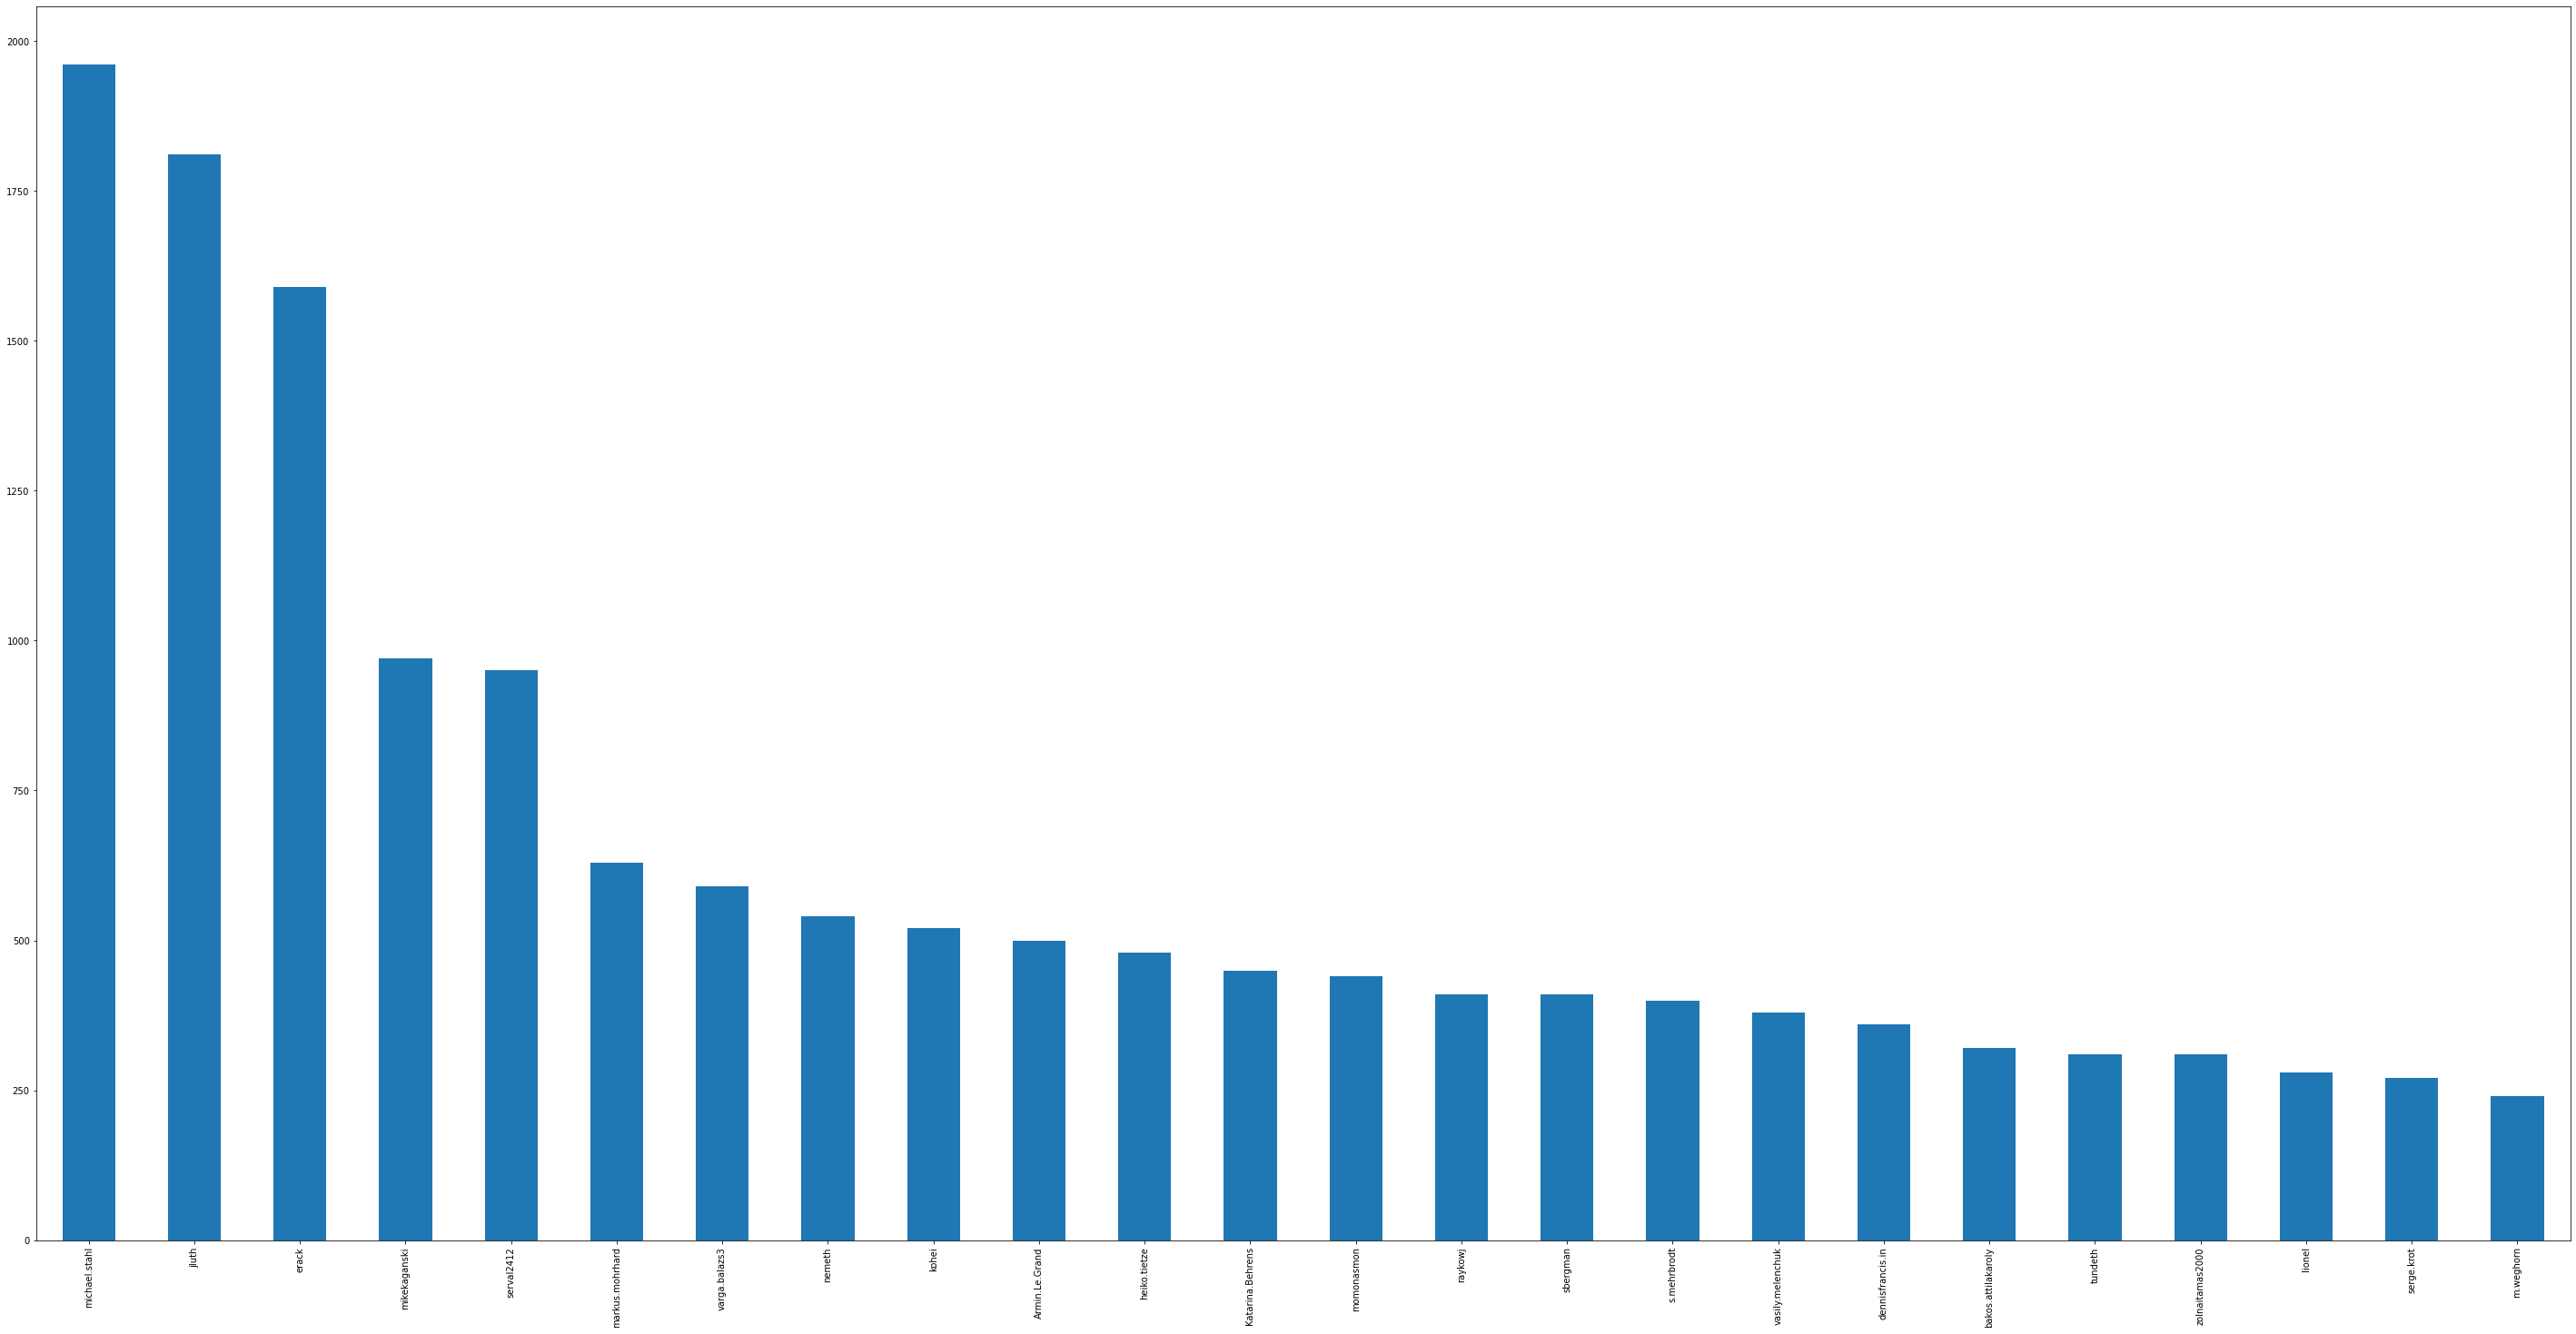

In [ ]:
# Easy data augmentation techniques for text classification
# Jason Wei and Kai Zou
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
#uploaded = files.upload()

import nltk
import gensim
from gensim import corpora

import random
from random import shuffle
random.seed(1)
nltk.download('stopwords')
nltk.download('wordnet')






#stop words list
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our',
			'ours', 'ourselves', 'you', 'your', 'yours',
			'yourself', 'yourselves', 'he', 'him', 'his',
			'himself', 'she', 'her', 'hers', 'herself',
			'it', 'its', 'itself', 'they', 'them', 'their',
			'theirs', 'themselves', 'what', 'which', 'who',
			'whom', 'this', 'that', 'these', 'those', 'am',
			'is', 'are', 'was', 'were', 'be', 'been', 'being',
			'have', 'has', 'had', 'having', 'do', 'does', 'did',
			'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
			'because', 'as', 'until', 'while', 'of', 'at',
			'by', 'for', 'with', 'about', 'against', 'between',
			'into', 'through', 'during', 'before', 'after',
			'above', 'below', 'to', 'from', 'up', 'down', 'in',
			'out', 'on', 'off', 'over', 'under', 'again',
			'further', 'then', 'once', 'here', 'there', 'when',
			'where', 'why', 'how', 'all', 'any', 'both', 'each',
			'few', 'more', 'most', 'other', 'some', 'such', 'no',
			'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
			'very', 's', 't', 'can', 'will', 'just', 'don',
			'should', 'now', '']



# import pprint as pp
df=pd.read_csv("eda_libretest.csv")                #bug-1:0.425  bug-2:0.347  bug-3:0.267    bug-5:0.325   bug-6:0.41  bug-9:0.29  bug-10:0.37
#df=df.head(100)
# #print(df["Assignee"].value_counts().plot.barh())



finaldf = df[['Assignee','Summary']]
valcnt = finaldf['Assignee'].value_counts()
print(valcnt)
print(len(valcnt))
print(finaldf)



finaldf['Assignee'].value_counts().plot.bar(figsize = (50,25))





In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1
